In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# K-Means Algorithm

K-Means algorithm is a clustring algorithm. It is also a classic Expectation-Maximization algorithm.<br> 
Given a set of observations (x1, x2, ..., xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, ..., Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance) <br>
The Step is as follows:
1. Randomly select k "cluster centers" from the data set;<br>
2. For each iteration (iterate through all points):<br>
(1). Find the nearest center for each point, and store the cluster for each center; <br>
(2). Calculate the new center for each cluster; <br>
(3). If there are no change of the means, end the loop; otherwise iterate. <br>

In [2]:
class KMeans():
    def __init__(self, k = 3, num_iter = 1000):
        """
            Some initializations, if neccesary
            
            Parameter:
                k: Number of clusters we are trying to classify
                num_iter: Number of iterations we are going to loop
        """
        
        self.model_name = 'KMeans'
        self.k = k
        self.num_iter = num_iter
        self.centers = None
        self.RM = None
        
    def fit(self, X):
        """
            Train the given dataset
            
            Parameter:
                X: Matrix or 2-D array. Input feature matrix.
                
            Return:
                self: the whole model containing relevant information
        """
        
        r, c = X.shape
        RM = np.zeros((r, self.k))
        
        """
            TODO: 1. Modify the following code to randomly choose the initial centers
        """
        initials = np.random.randint(r, size = self.k)
        centers = X[initials, :]
        
        for i in range(self.num_iter):
            for j in range(r):
                """
                    TODO: 2. Modify the following code to update the Relation Matrix
                """
                distance = np.square(centers - X[j,:]).sum(1)
                
                minpos = np.argmin(distance)
                temp_rm = np.zeros(self.k)
                temp_rm[minpos] = 1
                RM[j,:] = temp_rm
                
            new_centers = centers.copy()
            for l in range(self.k):
                """
                    TODO: 3. Modify the following code to update the centers
                """
                row_index = (RM[:, l] == 1).flatten()
                all_l = X[row_index, :]
                new_centers[l, :] = all_l.mean(0)
            if np.sum(new_centers - centers) < 1e-21:
                self.centers = new_centers
                self.RM = RM
                return self
            centers = new_centers
        self.centers = centers
        self.RM = RM
        return self

## Test on 2 dimension dataset

In [3]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X = X[:,[0,2]]

In [6]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,[0,2]]

(51, 2)
(41, 2)
(58, 2)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


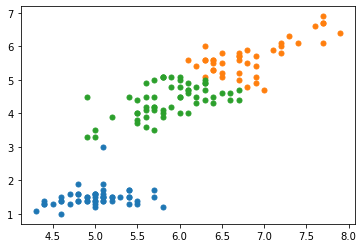

In [7]:
clf = KMeans(k = 3)
model = clf.fit(X)
r, c = model.RM.shape
groups = []
for i in range(c):
    index = [model.RM[:,i] == 1]
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

## Test on 3 dimension dataset

In [8]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,1:4]

In [9]:
clf = KMeans(k = 3)
model = clf.fit(X)

In [10]:
from mpl_toolkits.mplot3d import Axes3D

In [11]:
groups = []
r, c = model.RM.shape
for i in range(c):
    index = [model.RM[:,i] == 1]
    groups.append(X[index])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


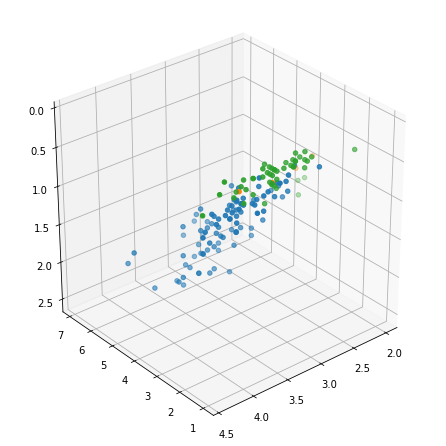

In [12]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
for group in groups:
    ax.scatter(group[:,0], group[:,1], group[:,2], marker='o')

Note: We should expect different results every time we run Kmeans as the centers are randomly initialized.

# Gaussian Mixture

Gaussian Mixture Algorithm is a softer version of the k-means algorithm. It is also a classic example of the Expectation-Maximization Algorithm. <br>
In Gaussian Mixture Algorithm, we model the data as coming from a mixture of Gaussians.<br>
In this example, we will be using a randomly generated Gaussian Distribution. <br>

In [13]:
def gaussian(X, mu, cov):
    """ 
        Fucntion to create mixtures using the Given matrix X, given covariance and given mu

        Return:
        transformed x.
    """
    # X should be matirx-like
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

## Test

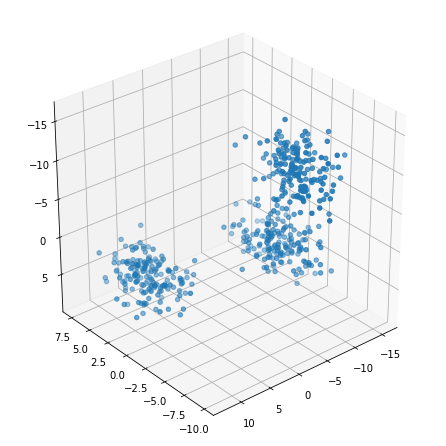

In [14]:
X, y = make_blobs(n_samples=500, n_features=3, cluster_std=2)
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')

In [15]:
def initialize_clusters(X, n_clusters):
    """ 
        Initialize the clusters by storing the information in the data matrix X into the clusters

        Parameter:
            X: Input feature matrix
            n_clusters: Number of clusters we are trying to classify

        Return:
            cluster: List of clusters. Each cluster center is calculated by the KMeans algorithm above.
    """
    clusters = []
    index = np.arange(X.shape[0])
    
    # We use the KMeans centroids to initialise the GMM
    
    kmeans = KMeans().fit(X)
    mu_k = kmeans.centers
    
    for i in range(n_clusters):
        clusters.append({
            'w_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

In [16]:
def expectation_step(X, clusters):
    """ 
        "E-Step" for the GM algorithm

        Parameter:
            X: Input feature matrix
            clusters: List of clusters
    """
    totals = np.zeros((X.shape[0], 1), dtype=np.float64)
    
    for cluster in clusters:
        w_k = cluster['w_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        
        """
            TODO: 4. Calculate the numerator part of the cluster posterior
        """
        
        posterior = w_k * gaussian(X, mu_k, cov_k)
        
        for i in range(X.shape[0]):
            """
            TODO: 5. Calculate the denominator part of the cluster posterior
            """
            totals[i] += posterior[i]
        
        cluster['posterior'] = posterior
        cluster['totals'] = totals
        
    
    for cluster in clusters:
        """
            TODO: 6. Calculate the cluster posterior using totals
        """
        cluster['posterior'] = cluster['posterior'] / cluster['totals']

In [17]:
def maximization_step(X, clusters):
    """ 
        "M-Step" for the GM algorithm

        Parameter:
            X: Input feature matrix
            clusters: List of clusters
    """
    N = float(X.shape[0])
  
    for cluster in clusters:
        posterior = cluster['posterior']
        cov_k = np.zeros((X.shape[1], X.shape[1]))
        
        """
            TODO: 7. Calculate the new cluster data
        """        
        N_k = np.sum(posterior, axis=0)
        w_k = N_k / N
        mu_k = (X * posterior).sum(0) / N_k
        for j in range(X.shape[0]):
            cov_k += posterior[j] * (X[j] - mu_k) * ((X[j] - mu_k).reshape((-1,1)))
        cov_k /= N_k 
        cluster['w_k'] = w_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

In [18]:
def get_likelihood(X, clusters):
    likelihood = []
    sample_likelihoods = np.log(np.array([cluster['totals'] for cluster in clusters]))
    return np.sum(sample_likelihoods), sample_likelihoods

In [19]:
def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))

    for i in range(n_epochs):
      
        expectation_step(X, clusters)
        maximization_step(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood
        
    for i, cluster in enumerate(clusters):
        scores[:, i] = np.log(cluster['w_k']).reshape(-1)
        
    return clusters, likelihoods, scores, sample_likelihoods

In [20]:
clusters, likelihoods, scores, sample_likelihoods = train_gmm(X, 3, 100)

In [21]:
c = np.array([clusters[0]['posterior'],clusters[1]['posterior'],clusters[2]['posterior']])

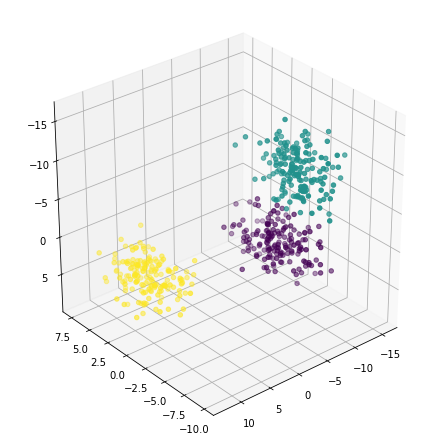

In [22]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o', c = c.argmax(0))

In [23]:
gmm = GaussianMixture(n_components=3, max_iter=50).fit(X)
gmm_scores = gmm.score_samples(X)

print('Means by sklearn:\n', gmm.means_)
print('Means by our implementation:\n', np.array([cluster['mu_k'].tolist() for cluster in clusters]))
print('Scores by sklearn:\n', gmm_scores[0:20])
print('Scores by our implementation:\n', sample_likelihoods.reshape(-1)[0:20])

Means by sklearn:
 [[ 6.77256123  3.20108493  4.26952046]
 [-8.2965122  -4.81651708 -9.87465012]
 [-7.57788705 -2.9708249   0.4038749 ]]
Means by our implementation:
 [[-7.57750352 -2.97044764  0.40795065]
 [-8.29632546 -4.81543041 -9.87057244]
 [ 6.77256133  3.201085    4.2695205 ]]
Scores by sklearn:
 [ -6.60655547  -8.8418142   -6.58021412  -7.47770133 -10.0425255
  -7.83029536  -7.99365686  -6.12699924  -8.63973839  -6.60050162
  -7.40294277  -6.27597127  -6.31062335  -6.41367969  -8.91386784
  -7.4736465   -7.60513458  -8.37381967  -7.48799821 -13.13660484]
Scores by our implementation:
 [ -6.60816586  -8.8418148   -6.58297004  -7.47201623 -10.04604936
  -7.83029547  -7.99365696  -6.12699885  -8.64096883  -6.60050154
  -7.40302652  -6.27752962  -6.31247461  -6.41465632  -8.91108027
  -7.47364684  -7.60513478  -8.37382008  -7.48804039 -13.14022225]


In [24]:
np.mean(abs(gmm_scores - sample_likelihoods.min(0).reshape(-1) )< 0.5)

1.0